本课程介绍微积分计算中重要的包Sympy
## Sympy
数学的教学、学习和实践中可以用符号和符号之间的运算来表示，而不是用数字表示。使用SymPy库可以编写包含符号的代数表达式解析操作。

In [1]:
!pip install sympy

### 定义符号和运算
在sympy中，可以通过Symbol类定义运算符号例如$x,y$

In [2]:
from sympy import Symbol
x=Symbol("x")
y=Symbol("y")
z=Symbol("z")
z=x*x-y
print(z)

x**2 - y


可以使用pprint来代替print输出公式，更为直观

In [3]:
from sympy import symbols
from sympy import pprint
x,y,z=symbols("x,y,z")
z=x*x*x+2-y*y
pprint(z)

 3    2    
x  - y  + 2


### 表达式的分解和展开
* factor()函数分解表达式
* expand()函数展开表达式
例如 
$$x^2-y^2=(x+y)(x-y)$$
左边为展开，右边为分解

In [4]:
from sympy import symbols,factor,expand
x,y,z=symbols("x,y,z")
z=x*x-y*y  
expr=factor(z)
pprint(expr)
pprint(expand(expr))

(x - y)⋅(x + y)
 2    2
x  - y 


### 输出级数






In [5]:
from sympy import Symbol,pprint, init_printing

def print_seris(n):
    #init_printing(order='rev-lex')# 默认中显示按照x的幂次方顺序排列，从高到低，如果希望反向，则可以使用init_printing(order='rev-lex')
    x=Symbol('x')
    series=x
    for i in range(2,n+1):
      series=series+(x**i)/i 
    pprint(series)
if __name__=='__main__':
 print("main")
 n=10
 print_seris(n)

main
 10    9    8    7    6    5    4    3    2    
x     x    x    x    x    x    x    x    x     
─── + ── + ── + ── + ── + ── + ── + ── + ── + x
 10   9    8    7    6    5    4    3    2     


### 对符号赋值

通过对变量赋值，即可计算或展开符号公式

* 赋值
* 进行符合函数赋值 $z=x; \quad x=y+a $

通过
``` python 

subs({x:a})

```
形式进行赋值运算

In [6]:
from sympy import symbols,expand,factor
x,y,z=symbols("x,y,z")
z=x*x*x+y*y
pprint(z)
res=z.subs({x:2,y:3})
pprint(res)

##############
res2=z.subs({x:y+2})
pprint(res2)
pprint(factor(res2))

 3    2
x  + y 
17
 2          3
y  + (y + 2) 
 3      2           
y  + 7⋅y  + 12⋅y + 8


### 公式简化
如果公式中有可以消元的项目，可使用
```python
simplify(expres)
```
进行简化，在没有显式指明的时候，sympy是不会对表达式解析简化

In [7]:
from sympy import simplify
pprint(simplify(factor(res2)))

 3      2           
y  + 7⋅y  + 12⋅y + 8


In [20]:
x=input("please input x")
print(x)

sympify可以将相关字符

In [8]:
from sympy import Symbol,pprint, init_printing, sympify
expr="x**5+y**3+2"
sympify(expr)

x**5 + y**3 + 2

In [13]:
from sympy import expand, sympify
from sympy.core.sympify import SympifyError
def product(exp1,exp2):
    exp1=simplify(exp1)
    exp2=simplify(exp2)
    return expand(exp1*exp2)
 

if __name__=='__main__':
    try:
        ex1="x**2+y**3"
        ex2="x**2-y"
        prob=product(ex1,ex2)
        simplify(prob)
    except SympifyError:
        print('some thing wrong')
    else:
        pprint(simplify(prob))

 4    2  3    2      4
x  + x ⋅y  - x ⋅y - y 


### 利用SymPy解方程
通过solve()可以解方程，注意方程总是假设表达式等于0，这就需要将方程所有变元移动到方程左边。

当方程得到多个解时，以字典形式返回对解集(需要dict=True)

In [16]:
#解二次方程
from sympy import solve 
x=Symbol("x")
exp=x**2-9
solve(exp,dict=True)


[{x: -3}, {x: 3}]

### solve中通过变量求解另外一个变量

通过solv中指定因变量，就可以得到因变量的自变量表达
```python 
solve (公式,因变量,dict=True)
```

In [27]:
from sympy import solve,factor,expand,simplify,symbols
s,u,t,a=symbols("s,u,t,a")
expres5=u*t+(1/2)*a*t**2-s
#pprint(expand(expres5))
#solve(expres5,dict=True)
pprint(solve(expres5,t,dict=True))

⎡⎧                           ______________⎫  ⎧                           ____
⎢⎪                          ╱            2 ⎪  ⎪                          ╱    
⎢⎨   -u - 1.4142135623731⋅╲╱  a⋅s + 0.5⋅u  ⎬  ⎨   -u + 1.4142135623731⋅╲╱  a⋅s
⎢⎪t: ──────────────────────────────────────⎪, ⎪t: ────────────────────────────
⎣⎩                     a                   ⎭  ⎩                     a         

__________⎫⎤
        2 ⎪⎥
 + 0.5⋅u  ⎬⎥
──────────⎪⎥
          ⎭⎦


### 解线性方程组
sympy中解线性方程组只需要将对应的方程带入sovle中即可

```
solve((express1,express2),dict=True)
```
例如

$$
\left\{
\begin{aligned}
2x+3y=6 \\
3x+2y=12
\end{aligned}
\right.
$$


In [36]:
#numpy 中解线性方程组
import numpy as np
A=np.array([[2,3],[3,2]])
b=np.array([[6,12]]).T
A_n=np.linalg.inv(A)
print("通过numpy得到线性方程解：",A_n@b)
# sympy中解线性方程组
from sympy import symbols,solve
x,y=symbols("x,y")
ex1=2*x+3*y-6
ex2=3*x+2*y-12
res2=solve((ex1,ex2),dict=True)
print("通过sympy解线性方程组： \n")
pprint(res2)
rx=res2[0]# 得到结果元组中字典解
rx[x]#得到对应变量解
rx[y]
#带入原方程解方程
ex1.subs({x:rx[x],y:rx[y]})


通过numpy得到线性方程解： [[ 4.8]
 [-1.2]]
通过sympy解线性方程组： 

[{x: 24/5, y: -6/5}]


0

### sympy 中的绘图
与matplotlib不同的是其可以直接绘制方程，也同样调用的是matplotlib
* 图线范围设置：
* 标题设置
* xlable,ylable 设置
```
plot((x**2),(x,-5,5),title="",xlable="x",ylable="y")

[5 - x**2]


c:\Users\tomis\anaconda3\lib\site-packages\sympy\plotting\plot.py:1538: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  self.fig.tight_layout()
c:\Users\tomis\anaconda3\lib\site-packages\sympy\plotting\plot.py:1538: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  self.fig.tight_layout()
c:\Users\tomis\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tomis\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


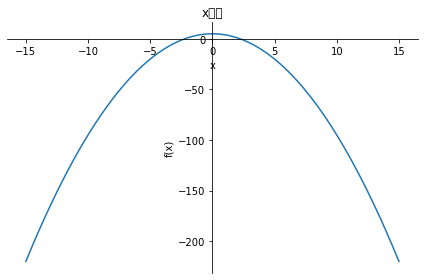

In [53]:
from sympy  import symbols
from sympy.plotting import plot
exp=simplify("y+x**2-5")
res=solve(exp,y)
print(res)

 
plot(res[0],(x,-15,15),title="x平方",xlable="x",ylable="x平方")

In [54]:
from sympy import Symbol,solve,simplify
from sympy.plotting import plot
def plot_y(exp):
    exp_in=simplify(exp)#将外部字符串公式转换为sympy的公式变量
    y=Symbol("y")
    res=solve(exp_in,y)
    exp_x=res[0]
    pprint(exp_x)
    #plot(exp_x)
if __name__=='main':
    try:
        exp="y+x**2-5"
        plot_y(exp)
    except Exception:
        print("some thing wrong")
